In [1]:
develop = False

## 2.1 Fourier Analysis in Two Dimensions
---
The **Fourier transform** is a mathematical tool used for the analysis of linear and non-linear phenomena. Your textbook assumes previous introduction to Fourier analysis (Mizzou's ECE 3830, ECE 4830) and extends typical one-dimensional analysis to two-dimensions.

---
### Why do we care?
This chapter is intended to build a *mathematical toolbox* for us to use when we start to do optical computations. As we will see later (Chapters 3-6) we employ ideas like the Huygens-Fresnel principle (the decomposing wavefronts into ensembles of independent point-sources) to build the foundations of Scalar Diffraction theory. It turns out that the electromagnetic equations for the propagation of wavefronts (under Scalar Diffraction theory assumptions) looks identical to the Fourier Transform of a two-dimensional signal (under certain physical conditions). This means that if we want to calculate the propagation of a two-dimensional wavefront, we can simply take the Fourier Transform of the source wavefront. 

This mathematical equivelence between the Fourier Transform of a two-dimensional signal and the propagation of a wavefront leads to deeper connections between Fourier Analysis and the tools/theorems/properties therein, with physical optical devices like lenses and apertures. Take for example the optical 4F system below:

| <img src="4fsystem.jpg" alt="4F System" width="500"/>|
| :--: |
|Piché, Kevin & Leach, Jonathan & Johnson, Allan & Salvail, Jeff & Kolobov, Mikhail & Boyd, Robert. (2012). Experimental realization of optical eigenmode super-resolution. Optics express. 20. 26424-33. 10.1364/OE.20.026424. |

Physically, we know that lenses focus light to a focal plane a known distance from the lens (a function of the curvature and index of refraction of the lens). The first lens in this diagram does exactly this onto the 'pupil plane'. As we will derive later (section 6.2), the mathematics of this focusing is identical to the Fourier Transform of the incident wavefront. This means that the wavefront at the pupil plane is the **spatial frequency spectrum** of the incident wavefront. By spatially restricting the wavefront at this plane by an aperture, we perform the equivelent of a **low-pass filter** on the original wavefront (identical to the various filtering windows discussed in ECE 4830). Finally, the second lens performs the inverse Fourier transform of the wavefront. The result at the image plane is a low-pass filtered version of the original wavefront.

The motivation for a deep understanding of Fourier Analysis, therefore, is this direct connection between the mathematics and physical devices that we will encounter in the lab. As a thought experiment, what would the physical aperture at the pupil plane in the previous 4F system need too look like to perform a **high-pass filter**?

---

### 2.1.1 Definition and Existence Conditions
The Fourier transform of a (in general, complex-valued) function $g(x,y)$ of two independent variables $x$ and $y$ is represented by $\mathcal{F}\{g\}$ and is defined as:
\begin{equation}
\mathcal{F}\{g\} = \iint_{-\infty}^{\infty} g(x,y) exp[-j2\pi (f_X x + f_Y y) ] dx dy.
\end{equation}

The transform is itself a complex-valued function of two independent variables $f_Y$ and $f_X$ which is generally referred to as **frequencies**. The **inverse Fourier transform** of a function $G(f_X, f_Y)$ is represented by $\mathcal{F}^{-1}\{G\}$ and is defined as:
\begin{equation}
\mathcal{F}\{G\} = \iint_{-\infty}^{\infty} G(f_X,f_Y) exp[j2\pi (f_X x + f_Y y) ] df_X df_Y.
\end{equation}

For both the Fourier transform and inverse Fourier transform, there are several mathimatical conditions placed on $g(x,y)$ such that the operations can be performed. It's often the case that we are interested in functions that violate these conditions and therefore we can not perform the Fourier transform and inverse Fourier transforms. In these cases, we move to a more general form of the Fourier and Inverse Fourier transforms where we represent our 'incompatible' functions as the limit of a sequence of functions that are transformable. While we wont get into specifics, it's important to understand that many of the Fourier transform / inverse Fourier transform pairs that we typically see listed in tables (like Table 2.1 in Goodman) may be 'generalized transforms'. 

### 2.1.2 The Fourier Transform as a Decomposition
We can interpret the two-dimensional Fourier transform as a decomposition of a function $g(x,y)$ into a linear combination of elementary functions of the form $exp[j2\pi(f_X x + f_Y y)]$. Goodman points out some interesting properties of these functions including **lines of zero phase**, **directed angle**, and the **spatial period**. These concepts have identical one dimension equivelents. In the following examples, we will look at decomposing the step function in one-dimension into its fourier components. We will then do the same example in two-dimensions.

In [16]:
# Import standard libraries for symbolic math, and visualizations
import numpy as np
from sympy import *
from sympy.plotting import plot3d, plot, PlotGrid
import matplotlib.pyplot as plt
from tqdm import tqdm

# Lets make our figures interactable
%matplotlib widget

# Allow for nice outputs using Latex and mathjax
init_printing( use_latex='mathjax' )

---
For the one-dimensional example, let's look at the function

\begin{equation}
x=
\begin{cases} 
      1 & 0 \leq x \leq \pi \\ 
      0 & otherwise
\end{cases}
\end{equation}

---

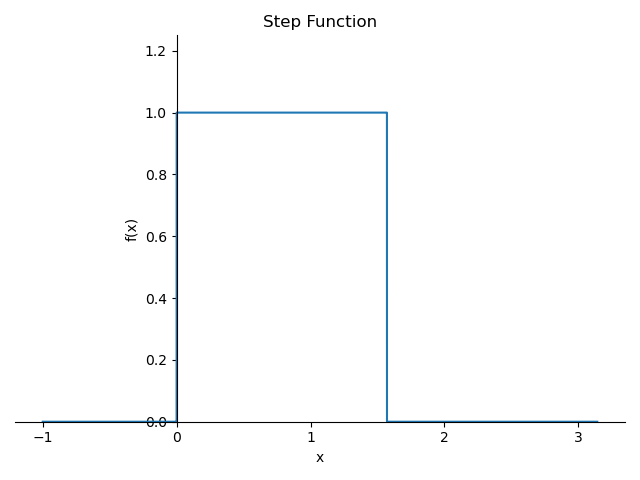

In [11]:
if develop : plt.close('all')

#Define our variables
x, k = symbols('x k')

#Define our step function
#We need to define it slightly different than we did above for SymPy, however they are equivalent.
eq1 = Piecewise( (0, x<0), (0,x>(pi/2)), (1, True) , show=False)

#Finally let's plot it
p_eq1 = plot(eq1, (x,-1, pi), ylim = (0,1.25), title='Step Function')

---
We know from digital signal processing that we can decompose signals into a discrete weighted combination of sines and cosines, i.e., the Fourier series:
\begin{equation}
    f(x) = a_0 + \sum_0^n a_n cos(nx) + b_n sin(nx)
\end{equation}
where
\begin{equation}
\begin{split}
a_0 &= \frac{1}{2\pi}\int_0^{2\pi} f(x) dx\\
a_n &= \frac{1}{2\pi}\int_0^{2\pi} f(x) cos(nx) dx\\
b_n &= \frac{1}{2\pi}\int_0^{2\pi} f(x) sin(nx) dx
\end{split}
\end{equation}

For our step function above, we can plot the first few terms of this decomposition:

---

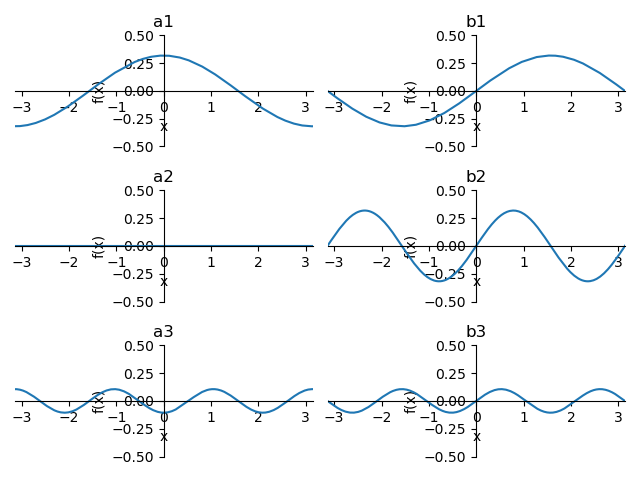

In [44]:
if develop : plt.close('all')

#First let's calculate our coefficients:
a0 = (1/(2*pi)) * integrate(eq1, (x, 0, 2*pi))

a1 = (1/(pi)) * integrate(eq1*cos(x), (x, 0, 2*pi))
a2 = (1/(pi)) * integrate(eq1*cos(2*x), (x, 0, 2*pi))
a3 = (1/(pi)) * integrate(eq1*cos(3*x), (x, 0, 2*pi))

b1 = (1/(pi)) * integrate(eq1*sin(x), (x, 0, 2*pi))
b2 = (1/(pi)) * integrate(eq1*sin(2*x), (x, 0, 2*pi))
b3 = (1/(pi)) * integrate(eq1*sin(3*x), (x, 0, 2*pi))

#Now we can plot the first few terms:
p0 = plot(a0, show=False)
p1 = plot(a1*cos(x), show=False, ylim = (-0.5,0.5), xlim=(-pi,pi), title='a1')
p2 = plot(a2*cos(2*x), show=False, ylim = (-0.5,0.5), xlim=(-pi,pi), title='a2')
p3 = plot(a3*cos(3*x), show=False, ylim = (-0.5,0.5), xlim=(-pi,pi), title='a3')

p11 = plot(b1*sin(x), show=False, ylim = (-0.5,0.5), xlim=(-pi,pi), title='b1')
p22 = plot(b2*sin(2*x), show=False, ylim = (-0.5,0.5), xlim=(-pi,pi), title='b2')
p33 = plot(b3*sin(3*x), show=False, ylim = (-0.5,0.5), xlim=(-pi,pi), title='b3')

#Put them in a grid:
PlotGrid(3,2,p1,p11,p2,p22,p3,p33)

---
If we combine these terms, we can get an estimate for our original function:

---

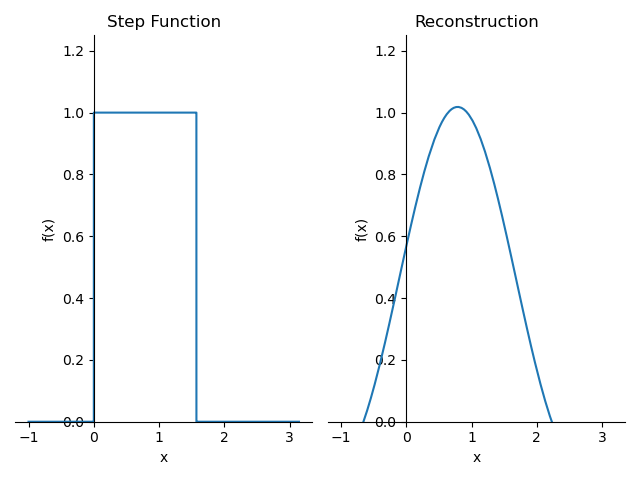

In [13]:
decomp = (1/(2*pi)) * integrate(eq1, (x, -pi, pi))
for i in range(1,3):    
    an = (1/(pi)) * integrate(eq1*cos(i*x), (x, 0, 2*pi))
    bn = (1/(pi)) * integrate(eq1*sin(i*x), (x, 0, 2*pi))
    
    decomp = decomp + (an) * cos(i*x)
    decomp = decomp + (bn) * sin(i*x)
    
p_recon = plot(decomp, (x, -1, pi), ylim=(0,1.25), show=False, title='Reconstruction')

PlotGrid(1,2, p_eq1, p_recon)

---
This reconstruction is obviously a poor estimate of the original. This is due to how few terms we are using for the decomposition / reconstruction. Let's do the same this but with 100 terms instead of only 3 (Note: This might take several seconds to run):

---

Calculating Coefficients: 100%|██████████████████████████████████████████| 99/99 [00:19<00:00,  4.95it/s]


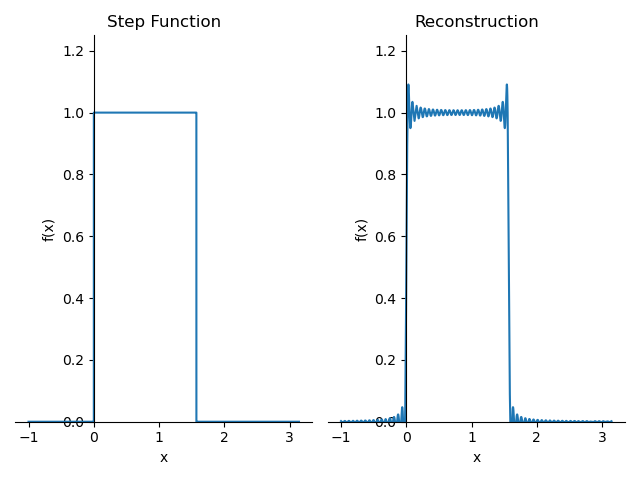

In [18]:
decomp = (1/(2*pi)) * integrate(eq1, (x, -pi, pi))
for i in tqdm(range(1,100), desc='Calculating Coefficients'):    
    an = (1/(pi)) * integrate(eq1*cos(i*x), (x, 0, 2*pi))
    bn = (1/(pi)) * integrate(eq1*sin(i*x), (x, 0, 2*pi))
    
    decomp = decomp + (an) * cos(i*x)
    decomp = decomp + (bn) * sin(i*x)
    
p_recon = plot(decomp, (x, -1, pi), ylim=(0,1.25), show=False, title='Reconstruction')

PlotGrid(1,2, p_eq1, p_recon)

---
As we can see this reconstruction is a much better approximation to the original. As you can imagine, the more terms we add the better the decomposition / reconstruction will be. Now it's important to note that we used the Fourier series for our above examples and not the Fourier transform. Need help finishing this thought.



It's often the case that we want to look at these coefficients to gain insight into our function. For example, we may want to know how much of a specific frequency is folded into our signal. Now we could follow the process above and calculate the coeficient for each frequency, or we can simply take the Fourier transform and plot the magnitude:

---

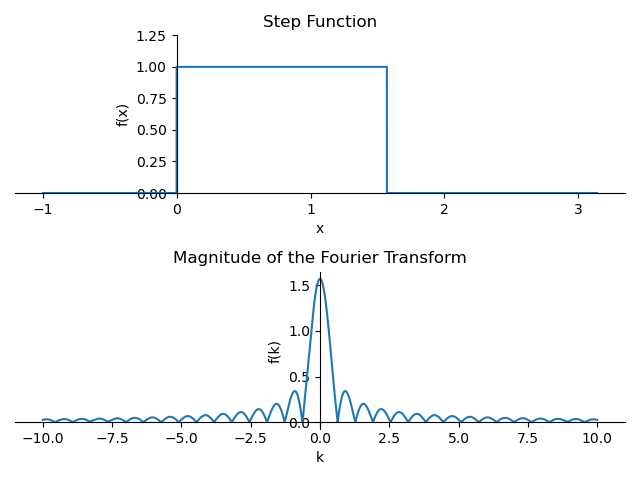

In [27]:
#Let's take the Fourier Transform of our step function
ft1 = fourier_transform(eq1, x, k)

#Plot the magnitude of the Fourier Transform
p_ft1 = plot(abs(ft1), show=False, title='Magnitude of the Fourier Transform')

#Let's plot alongside the original for a comparison.
grid = PlotGrid(2,1,p_eq1,p_ft1)

---
The values of the Fourier transform at a particulat value $k$ correspond directly to the value of the coeficients $a_k$ we calculated above. The main difference here is that we now have a continuous distribution of coeficients and frequencies rather than the discrete pairings that we used above. As we can see the step funciton has many frequencies folded into it. To further convice ourselves that the magnitude of the Fourier transform correspond to coefficient values of the Fourier series, we can look at a more simple function:

\begin{equation}
f(x) = sin\left( \frac{5}{8}\pi x \right)
\end{equation}

For this function it's obvious that there is a single frequency, i.e, $\frac{5}{8}$. When we plot the Fourier transform of this function we should expect a peak at this frequency value and zeros everwhere else.

---

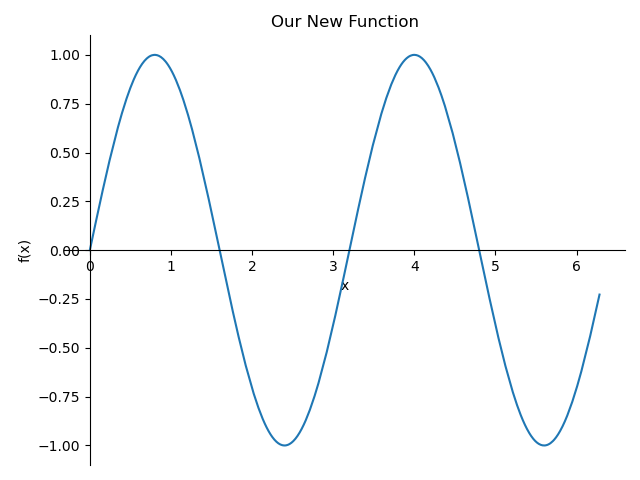

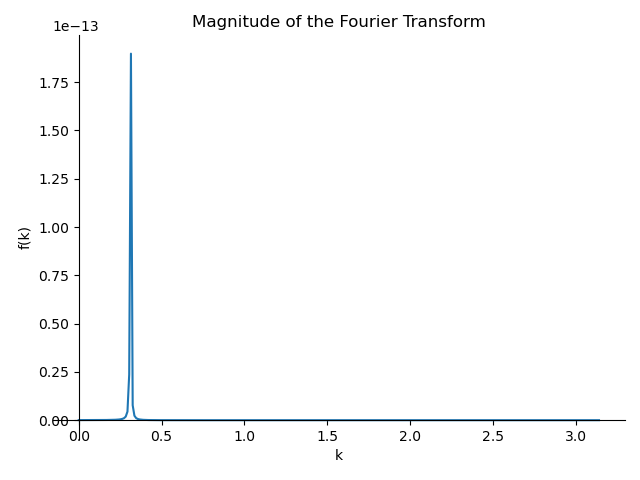

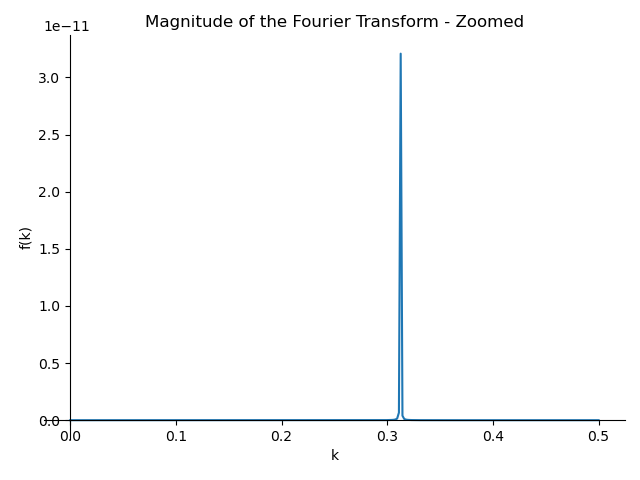

In [110]:
if develop : plt.close('all')
#First let's define our new function
#We are going to use a slight approximation to the above. This simply for fixing plotting issues.
eq2 = sin( (5/8)*(3.14159) * x)

#Let's plot it to view later
p_eq2 = plot(eq2, (x,0,2*pi), title="Our New Function")

#Let's take the Fourier Transform of our new function
ft2 = fourier_transform(eq2, x, k)

#Plot the magnitude of the Fourier Transform
p_ft2 = plot(abs(ft2), (k,0,pi), title='Magnitude of the Fourier Transform', adaptive=False)

p2_ft2 = plot(abs(ft2), (k,0,0.5), title='Magnitude of the Fourier Transform - Zoomed', adaptive=False)

---
As expected the Fourier transform of our sinusoidal function is a peak at a single frequency.

Now let's go through the same example but in 2 dimensions.

---

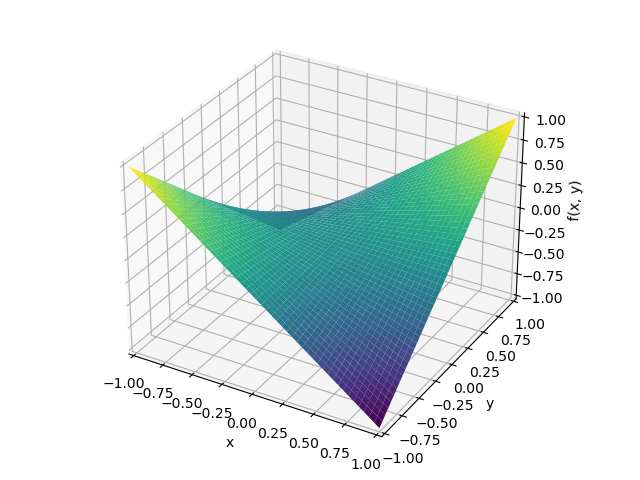

In [123]:
#First let's make sure our 3d plots are working as expected
x,y = symbols('x y')
equation = x*y
plot3d(equation, (x, -1, 1), (y, -1,1))

In [169]:
if develop : plt.close('all')

x = np.linspace(-2,2,100)
y = np.linspace(-2,2,100)

values = [x_ <= 1 and x_ >= 0 for x_ in x]



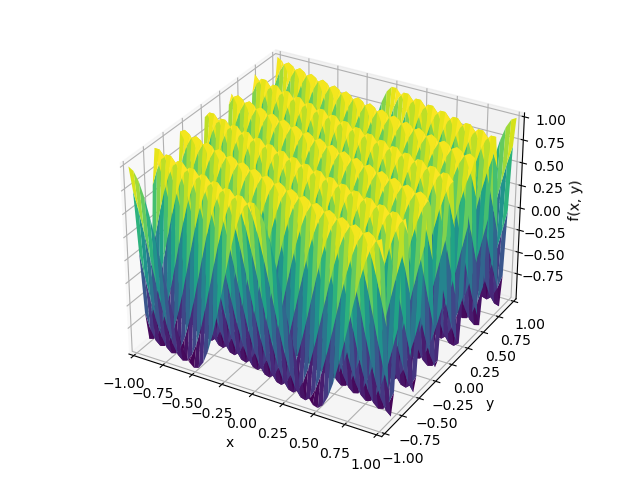

In [113]:
if develop : plt.close('all')
#Now our functions of interest
plt.close('all')
fx = 1
fy = 3
equation = exp(I * 2 * pi * (fx * x + fy * y))
plot3d(equation, (x,-1,1), (y, -1,1))

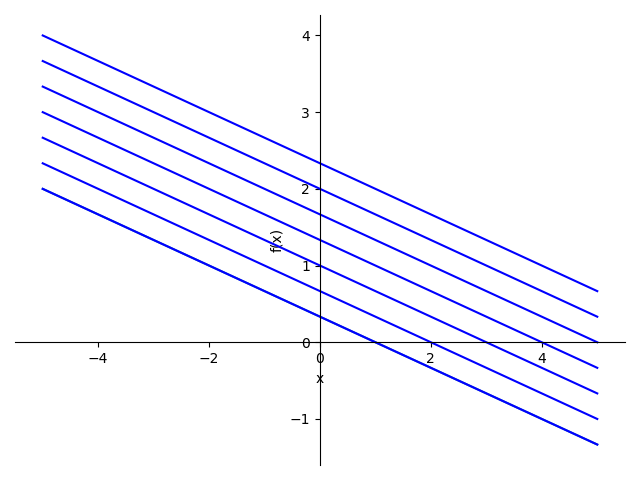

(-5.0, 5.0)

In [10]:
plt.close('all')
    
# A 2D plot of the 'lines of zero phase'
p = plot((-fx / fy)*x + (1 / fy), (x, -5,5), show=False)
for n in range(1,8):
    p1 = plot((-fx / fy)*x + (n / fy), (x, -5,5), show=False, line_color='b')
    p.append(p1[0])
p.show()
# Orientation vector
X = 0
Y = 0
theta = np.arctan(fy/fx)
U = np.cos(theta)
V = np.sin(theta)
plt.quiver(X,Y,U,V, width=0.005, scale=3)
plt.ylim(-5,5)

### 2.1.3 Fourier Transform Theorems
---
1. ***Linearity Theorem*** : 

\begin{equation}
\mathcal{F}\{ \alpha g + \beta h\} = \alpha \mathcal{F}\{g\} + \beta \mathcal{F}\{h\}
\end{equation}

That is, the transform of a weighted sum of two (or more) functions is simply the identically weighted sum of their individual transforms.

2. ***Similarity Theorem*** : If $\mathcal{F}\{ g(x,y) \} = G(f_X, f_Y)$, then
\begin{equation}
\mathcal{F}\{ g(ax, by)\} = \frac{1}{|ab|}G\left( \frac{f_X}{a}, \frac{f_Y}{b}\right)
\end{equation}

That is, a 'stretch' of the coordinates in the space domain $(x,y)$ results in a contraction of the coordinates in the frequency domain $(f_X, f_Y)$, plus a change in the overall amplitude of the spectrum.

3. ***Shift Theorem*** : If $\mathcal{F}\{ g(x,y)\} = G(f_X, f_Y)$, then
\begin{equation}
\mathcal{F}\{ g(x-a, y-b)\} = G(f_X, f_Y)exp[-j2\pi (f_X a + f_Y b)]
\end{equation}

That is, translation in the space domain introduces a linear phase shift in the frequency domain.

4. ***Rayleigh's Theorem (Parseval's Theorem)*** : If $\mathcal{F}\{ g(x,y)\} = G(f_X, f_Y)$, then
\begin{equation}
\iint_{-\infty}^{\infty} |g(x,y)|^2 dxdy = \iint_{-\infty}^{\infty} |G(f_X, f_Y)|^2 df_X df_Y
\end{equation}

The integral on the left-hand side of this theorem can be interpreted as the energy contained in the waveform $g(x,y)$. This in turn leads us to the idea that the quantity $|G(f_X, f_Y)|^2$ can be interpreted as the energy density in the frequency domain.

5. ***Convolutional Theorem*** : If $\mathcal{F}\{ g(x,y)\} = G(f_X, f_Y)$ and $\mathcal{F}\{ h(x,y)\} = H(f_X, f_Y)$, then
\begin{equation}
\mathcal{F}\left\{ \iint_{-\infty}^{\infty}g(\xi,\eta)h(x-\xi, y-\eta)d\xi d\eta \right\} = G(f_X, f_Y)H(f_X,f_Y)
\end{equation}

That is, the convolution of two functions in the space domain (an operation that will be found to arise frequently in the theory of linear systems) is entirely equivalent to the simpler operation of multiplying their individual transforms and inverse transforming.

6. ***Autocorrelation Theorem*** : If $\mathcal{F}\{ g(x,y)\} = G(f_X, f_Y)$, then
\begin{equation}
\mathcal{F}\left\{ \iint_{-\infty}^{\infty}g(\xi,\eta)g^*(\xi - x, \eta - y)d\xi d\eta \right\} = |G(f_X, f_Y)|^2
\end{equation}

and similarly

\begin{equation}
\mathcal{F}\left\{|g(x,y)|^2\right\} = \iint_{-\infty}^{\infty}G(\xi,\eta)G^*(\xi - f_X, \eta - f_Y)d\xi d\eta
\end{equation}

This theorem may be regarded as a special case of the convolution theorem in which we convolve $g(x,y)$ with $g^*(-x,-y)$.

7. ***Rotation Theorem*** : Let $\mathcal{F}\left\{ g(r,\theta) \right\} = G(\rho, \phi)$, with $(r,\theta)$ being radius and angle in the space domain and $(\rho, \phi)$ being radius and angle in the frequency domain. Then a rotation $g(r, \theta + \theta_0)$ by angle $\theta_0$ in the space plane results in an identical rotation $G(\rho, \phi + \theta_0)$ in the frequency plane. In rectangular coordinates,
\begin{equation}
\mathcal{F}\left \{ g(xcos\theta - ysin\theta, xsin\theta + ycos\theta)\right\} = G(f_Xcos\theta - f_Ysin\theta, f_Xsin\theta + f_Ycos\theta)
\end{equation}

8. ***Shear Theorem*** : The function $g(x+by, y)$ represents a horizontal shear of the fucntion $g(x,y)$, while the function $g(x, y + cx)$ represents a vertical shear of $g(x,y)$. If $\mathcal{F}\{g(x,y)\} = G(f_X,f_Y)$,then
\begin{equation}
\begin{split}
\mathcal{F}\{ g(x + by, y) \} &= G(f_X, f_Y - bf_X) \\
\mathcal{F}\{ g(x, y + cx) \} &= G(f_X -cf_Y, f_Y).
\end{split}
\end{equation}

Thus a horizontal shear in the space domain results in a vertical shear in the frequency domain, while a vertical shear in the space domain results in a horizontal shear in the frequency domain.

9. ***Fourier Integral Theorem*** : At each point of continuity of $g$
\begin{equation}
\mathcal{F}\mathcal{F}^{-1}\{g(x,y)\} = \mathcal{F}^{-1}\mathcal{F}\{g(x,y)\} = g(x,y)
\end{equation}

At each point of discontinuity of $g$, the two successive transforms yield the angular average of the values of $g$ in a small neighborhood of that point. That is, the sucessive transformation and inverse transformation of a fuction yields that function again, except at points of discontinuity.

### 2.1.4 Separable Functions
---
### 2.1.5 Functions with Circular Symmetry: Fourier-Bessel Transforms
---
### 2.1.6 Some Frequently Used Functions and Some Useful Fourier Transform Pairs
---

## 2.2 Spatial Frequency and Space-Frequency Localization
---

### Problem 2-1
---
##### Prove the following properties of $\delta$ function:

1. $\delta(ax,by) = \frac{1}{|ab|} \delta(x,y)$
2. $comb(ax)comb(by) = \frac{1}{|ab|}\sum^\infty_{n=-\infty} \sum^\infty_{m=-\infty} \delta(x-\frac{n}{a}, y - \frac{m}{b})$

### Problem 2-2
---
##### Prove the following Fourier transform relations:

1. $\mathcal{F} \{rect(x) rect(y)\} = sinc(f_X) sinc(f_Y)$
2. $\mathcal{F} \{ \Lambda (x) \Lambda (y) \} = sinc^2(f_X) sinc^2(f_Y)$

### Problem 2-3
---
##### Prove the following Fourier transform theorems:

1. $\mathcal{F} \mathcal{F} \{g(x,y) \}  =  \mathcal{F}^{-1} \mathcal{F}^{-1} \{ g(x,y)\} = g(-x,-y)$ at all points of continuity of $g(\cdot)$.
2. $\mathcal{F} \{ g(x,y) h(x,y) \} = \mathcal{F} \{ g(x,y) \} * \mathcal{F}\{ h(x,y) \} $
3. $\mathcal{F} \left\{ \nabla^2 g(x,y)\right\} = -4\pi^2(f_X^2 + f_Y^2)\mathcal{F}\{ g(x,y)\}$ where $\nabla^2$ is the Laplacian Operator, 

\begin{equation}
\nabla^2 = \frac{\partial^2}{\partial x^2} +\frac{\partial^2}{\partial y^2}
\end{equation}

### Problem 2-4
---
##### Let the transform operators $\mathcal{F}_A \{\cdot \}$ and $\mathcal{F}_B \{\cdot \}$ be defined by
\begin{align}
\mathcal{F}_A \{g\} &= \frac{1}{a} \iint_{-\infty}^{\infty}g(\xi, \eta) exp\left[ -j\frac{2\pi}{a}(f_X \xi + f_Y \eta) \right]d\xi d\eta \\
\mathcal{F}_B \{g\} &= \frac{1}{b} \iint_{-\infty}^{\infty}g(\xi, \eta) exp\left[ -j\frac{2\pi}{b}(x \xi + y \eta) \right]d\xi d\eta
\end{align}

1. Find a simple interpretation for 
\begin{equation}
\mathcal{F}_B \{ \mathcal{F}_A \{ g(x,y) \} \}
\end{equation}
2. Interpret the results for $a>b$ and $a < b$.

### Problem 2-5
---
##### The "equivalent area" $\Delta_{XY}$ of a function $g(x,y)$ can be defined by
\begin{equation}
\Delta_{XY} = \frac{\iint_{-\infty}^{\infty}g(x,y)dxdy}{g(0,0)}
\end{equation}
##### while the "equivalent bandwidth" $\Delta_{f_X f_Y}$ of $g$ is defined in terms of its transform $G$ by
\begin{equation}
\Delta_{f_X f_Y} = \frac{\iint_{-\infty}^{\infty} G(f_X, f_Y) df_X df_Y}{G(0,0)}
\end{equation}
1. Show that $\Delta_{XY} \Delta_{f_X f_Y} = 1$.

### Problem 2-6
---
##### Prove the follwing Fourier-Bessel transform relations:
1. If $g_R(r) = \delta(r-r_0)$, then
\begin{equation}
\mathcal{B} \{ g_R(r) \} = 2\pi r_0 J_0(2\pi r_0 \rho)
\end{equation}
2. If $g_R(r) = 1$ for $a\leq r \leq 1$ and zero otherwise, then
\begin{equation}
\mathcal{B} \{ g_R(r) \} = \frac{J_1(2\pi \rho) - aJ_1(2\pi a \rho)}{\rho}
\end{equation}
3. If $\mathcal{B}\{g_R(r) \} = G(\rho)$, then
\begin{equation}
\mathcal{B} \{ g_R(ar) \} = \frac{1}{a^2} G \left( \frac{\rho}{a} \right)
\end{equation}
4. $\mathcal{B} \left \{ exp(-\pi r^2 ) \right \} = exp(-\pi \rho^2)$

### Problem 2-7
---
##### Let $g(r,\theta)$ bbe separable in polar coordinates.
1. Show that if $g(r,\theta) = g_R(r)e^{jm\theta}$, then
\begin{equation}
\mathcal{F}\{ g(r,\theta) \} = (-j)^m e^{jm\phi}\mathcal{H}_m \{ g_R(r) \}
\end{equation}
where $\mathcal{H}_m\{ \cdot \}$ is the Hankel transform of order m,
\begin{equation}
\mathcal{H}_m\{ g_R(r)\} = 2\pi \int_0^{\infty} rg_R(r)J_m(2\pi r \rho) dr
\end{equation}
and $(\rho,\phi)$ are polar coordinates in the frequency space.

Hint: $exp(ja sin(x)) = \sum_{k=-\infty}^{\infty} J_k(a)exp(jkx)$